[0, 1]
[0, 1, 1]
[0, 1, 1, 2]
[0, 1, 1, 2, 3]
[0, 1, 1, 2, 3, 5]
[0, 1, 1, 2, 3, 5, 8]
[0, 1, 1, 2, 3, 5, 8, 13]
[0, 1, 1, 2, 3, 5, 8, 13, 21]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34

/tmp/ipykernel_445/2574874921.py:26: RuntimeWarning: divide by zero encountered in long_scalars
  return fibn/fibnminus1


<function matplotlib.pyplot.show(close=None, block=None)>

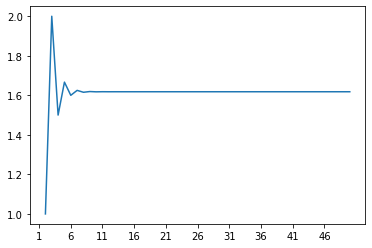

In [2]:
import time
import matplotlib.pylab as plt
import numpy as np

#Question 1

#Memorization method is copied from the lecture notebook
def fibmem(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] =  fibmem((n-1),table)+fibmem((n-2),table)# try this:  please finish this line using recursive method
        
    return table[n]
#define a fibratio 
def fibratio(n):
    table = [None]*(n+1)
    table[0]=0
    table[1]=1
    fibn=fibmem(n,table)
    #since we know the table has to calculate fibmem(n-1) in order to calculate (fibmem(n)), we can simply recall fibmem(n-1) from the table
    fibnminus1=table[n-1]
    print(table)
    return fibn/fibnminus1
#set up and run a plot
x_vals = np.arange(1,51)
y_vals = []
for x_val in x_vals:
    y_vals.append(fibratio(x_val))
plt.plot(x_vals,y_vals)
plt.xticks(np.arange(min(x_vals), max(x_vals)+1, 5.0))
plt.show

In [26]:
import time
import matplotlib.pylab as plt
import numpy as np
import math

#Question 2
#Fib methods taken from the lectures
#make sure to delete the currently existing hw2_time_log file when re-executing this

#initialize log file for the writing portion of the assignment
logw = open('./hw2_time_log.txt','a')

#define the various fib methods, taken from lectures


def fib_rec(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib_rec(n-1)+fib_rec(n-2)

def fib_tab(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in range(2,n+1):
        table[i]=  table[i-1]+table[i-2]        
    return table[n]

def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib_mat(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

#initialise list of exponential n values
n_list = np.arange(1,10000,10)

#HIGHER POWERS OF 10 CRASH MY MACHINE

for en in n_list:
    #reset line
    line=[None]*(4)
    #store our various n values
    line[0]=en
    #recursion method
    #to avoid recursion overflow only calculate the time if n<100
    if en<40:
        rec_time_start = time.time()
        #no need to actually print these values, and they get extremely large. Just set equal to some dummy variable
        a=fib_rec(en)
        line[1]=time.time()-rec_time_start
    elif en>=41:
        line[1]=0

    #tabulation method
    tab_start_time=time.time()
    a=fib_tab(en)
    line[2]=time.time()-tab_start_time
    
    #matrix method
     
    #matrix method throws an error for n = 1, so catch this
    if en ==1:
        line[3]=0
    else:
        mat_start_time=time.time()
        a=fib_mat(en)      
        line[3]=time.time()-mat_start_time
    
    print('Loop iterated for n = '+str(en)+'\n')
    #write line to the file
    logw.write(str(line[0])+' '+str(line[1])+' '+str(line[2])+' '+str(line[3])+'\n')

#close the file
logw.close()    

Loop iterated for n = 1

Loop iterated for n = 11

Loop iterated for n = 21

Loop iterated for n = 31

Loop iterated for n = 41

Loop iterated for n = 51

Loop iterated for n = 61

Loop iterated for n = 71

Loop iterated for n = 81

Loop iterated for n = 91

Loop iterated for n = 101

Loop iterated for n = 111

Loop iterated for n = 121

Loop iterated for n = 131

Loop iterated for n = 141

Loop iterated for n = 151

Loop iterated for n = 161

Loop iterated for n = 171

Loop iterated for n = 181

Loop iterated for n = 191

Loop iterated for n = 201

Loop iterated for n = 211

Loop iterated for n = 221

Loop iterated for n = 231

Loop iterated for n = 241

Loop iterated for n = 251

Loop iterated for n = 261

Loop iterated for n = 271

Loop iterated for n = 281

Loop iterated for n = 291

Loop iterated for n = 301

Loop iterated for n = 311

Loop iterated for n = 321

Loop iterated for n = 331

Loop iterated for n = 341

Loop iterated for n = 351

Loop iterated for n = 361

Loop iterate

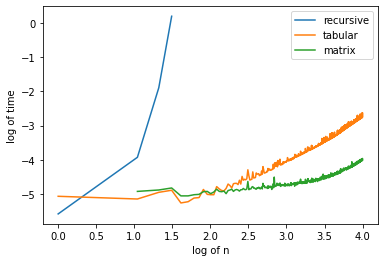

In [28]:
#read from the file and make a log-log plot
import matplotlib.pylab as plt
import numpy as np

logr = open('./hw2_time_log.txt','r')
n_list_rec = []
n_list_tab = []
n_list_mat = []
rec_times = []
tab_times = []
mat_times = []

#extract data from lines of log file
#data is stored in logarithmic form
for line in logr:
    arr=list(map(float,line.split()))
         
    if arr[1] != 0:
            n_list_rec.append(np.log10(arr[0]))
            rec_times.append(np.log10(arr[1]))
    if arr[2] != 0:
        n_list_tab.append(np.log10(arr[0]))
        tab_times.append(np.log10(arr[2]))
    if arr[3] != 0:
        n_list_mat.append(np.log10(arr[0]))
        mat_times.append(np.log10(arr[3]))



plt.plot(n_list_rec,rec_times,label='recursive')
plt.plot(n_list_tab,tab_times,label = 'tabular')
plt.plot(n_list_mat,mat_times,label = 'matrix')
plt.xlabel('log of n')
plt.ylabel('log of time')
plt.legend()
plt.show()
    


The complexity of the recursive method goes as a^n where a is some constant. The tabular method goes approximately as n. The matrix method appears to go as sqrt(n) or some fractional power close to it.The slope of the line on a log/log plot gives the exponent to which n is raised. Of the methods tried, the matrix method is the most time efficient.